In [0]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database. 

## Learning objectives:

After doing this exercise, you'll know how to do the following:

  * Run Colabs.
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

## About Colabs

Machine Learning Crash Course uses Colaboratories (**Colabs**) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). Like all Jupyter Notebooks, a Colab consists of two kinds of components:

  * **Text cells**, which contain explanations. You are currently reading a text cell.
  * **Code cells**, which contain Python code for you to run. Code cells have a light gray background.

You *read* the text cells and *run* the code cells.

### Running code cells

You must run code cells in order. In other words, you may only run a code cell once all the code cells preceding it have already been run. 

To run a code cell:

  1. Place the cursor anywhere inside the [ ] area at the top left of a code cell. The area inside the [ ] will display an arrow.
  2. Click the arrow.

Alternatively, you may invoke **Runtime->Run all**. Note, though, that some of the code cells will fail because not all the coding is complete. (You'll complete the coding as part of the exercise.)

### Understanding hidden code cells

We've **hidden** the code in code cells that don't advance the learning objectives. For example, we've hidden the code that plots graphs. However, **you must still run code cells containing hidden code**. You'll know that the code is hidden because you'll see a title (for example, "Load the functions that build and train a model") without seeing the code.

To view the hidden code, just double click the header.

### Why did you see an error?

If a code cell returns an error when you run it, consider two common problems:

  * You didn't run *all* of the code cells preceding the current code cell.
  * If the code cell is labeled as a **Task**, then you haven't written the necessary code. 

## Use the right version of TensorFlow

The following hidden code cell ensures that the Colab will run on TensorFlow 2.X, which is the most recent version of TensorFlow:

In [3]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


## Import relevant modules

The following cell imports the packages that the program requires:

In [6]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [7]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [8]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 12 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [9]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 280.0426 - root_mean_squared_error: 16.7345
Epoch 2/10
1/1 [==============================] - 0s 996us/step - loss: 271.3862 - root_mean_squared_error: 16.4738
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 265.2376 - root_mean_squared_error: 16.2861
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 260.1668 - root_mean_squared_error: 16.1297
Epoch 5/10
1/1 [==============================] - 0s 956us/step - loss: 255.7218 - root_mean_squared_error: 15.9913
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 251.6936 - root_mean_squared_error: 15.8649
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 247.9660 - root_mean_squared_error: 15.7469
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 244.4667 - root_mean_squared_error: 15.6354
Epoch 9/10
1/1 [==============================] - 0s 995us/step - loss: 241.1474 - r

/Users/eric/.conda/envs/mlbase/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


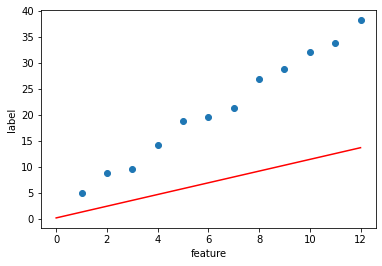

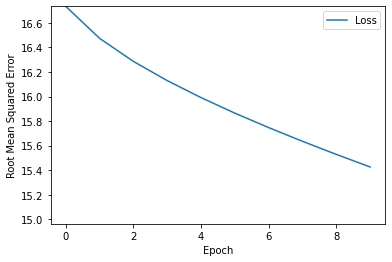

In [10]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 1: Examine the graphs

Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots.  Does it?  Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train.  That said, unless you are an extremely lucky person, the red line probably *doesn't* align nicely with the blue dots.  

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

## Task 2: Increase the number of epochs

Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has [converged](http://developers.google.com/machine-learning/glossary/#convergence).

In Task 1, the training loss did not converge. One possible solution is to train for more epochs.  Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/400
1/1 [==============================] - 0s 2ms/step - loss: 184.9640 - root_mean_squared_error: 13.6001
Epoch 2/400
1/1 [==============================] - 0s 1ms/step - loss: 177.9486 - root_mean_squared_error: 13.3397
Epoch 3/400
1/1 [==============================] - 0s 935us/step - loss: 172.9904 - root_mean_squared_error: 13.1526
Epoch 4/400
1/1 [==============================] - 0s 833us/step - loss: 168.9159 - root_mean_squared_error: 12.9968
Epoch 5/400
1/1 [==============================] - 0s 2ms/step - loss: 165.3552 - root_mean_squared_error: 12.8591
Epoch 6/400
1/1 [==============================] - 0s 839us/step - loss: 162.1370 - root_mean_squared_error: 12.7333
Epoch 7/400
1/1 [==============================] - 0s 1ms/step - loss: 159.1664 - root_mean_squared_error: 12.6161
Epoch 8/400
1/1 [==============================] - 0s 1ms/step - loss: 156.3842 - root_mean_squared_error: 12.5054
Epoch 9/400
1/1 [==============================] - 0s 743us/step - loss: 1

1/1 [==============================] - 0s 1ms/step - loss: 55.5428 - root_mean_squared_error: 7.4527
Epoch 72/400
1/1 [==============================] - 0s 1ms/step - loss: 54.4354 - root_mean_squared_error: 7.3780
Epoch 73/400
1/1 [==============================] - 0s 730us/step - loss: 53.3403 - root_mean_squared_error: 7.3034
Epoch 74/400
1/1 [==============================] - 0s 719us/step - loss: 52.2576 - root_mean_squared_error: 7.2289
Epoch 75/400
1/1 [==============================] - 0s 824us/step - loss: 51.1872 - root_mean_squared_error: 7.1545
Epoch 76/400
1/1 [==============================] - 0s 951us/step - loss: 50.1290 - root_mean_squared_error: 7.0802
Epoch 77/400
1/1 [==============================] - 0s 2ms/step - loss: 49.0832 - root_mean_squared_error: 7.0059
Epoch 78/400
1/1 [==============================] - 0s 795us/step - loss: 48.0496 - root_mean_squared_error: 6.9318
Epoch 79/400
1/1 [==============================] - 0s 739us/step - loss: 47.0282 - root_me

1/1 [==============================] - 0s 778us/step - loss: 6.6511 - root_mean_squared_error: 2.5790
Epoch 142/400
1/1 [==============================] - 0s 2ms/step - loss: 6.3475 - root_mean_squared_error: 2.5194
Epoch 143/400
1/1 [==============================] - 0s 934us/step - loss: 6.0538 - root_mean_squared_error: 2.4604
Epoch 144/400
1/1 [==============================] - 0s 1ms/step - loss: 5.7699 - root_mean_squared_error: 2.4021
Epoch 145/400
1/1 [==============================] - 0s 946us/step - loss: 5.4958 - root_mean_squared_error: 2.3443
Epoch 146/400
1/1 [==============================] - 0s 1ms/step - loss: 5.2313 - root_mean_squared_error: 2.2872
Epoch 147/400
1/1 [==============================] - 0s 874us/step - loss: 4.9764 - root_mean_squared_error: 2.2308
Epoch 148/400
1/1 [==============================] - 0s 854us/step - loss: 4.7311 - root_mean_squared_error: 2.1751
Epoch 149/400
1/1 [==============================] - 0s 828us/step - loss: 4.4950 - root_mea

1/1 [==============================] - 0s 797us/step - loss: 0.9198 - root_mean_squared_error: 0.9590
Epoch 213/400
1/1 [==============================] - 0s 812us/step - loss: 0.9189 - root_mean_squared_error: 0.9586
Epoch 214/400
1/1 [==============================] - 0s 767us/step - loss: 0.9180 - root_mean_squared_error: 0.9581
Epoch 215/400
1/1 [==============================] - 0s 758us/step - loss: 0.9170 - root_mean_squared_error: 0.9576
Epoch 216/400
1/1 [==============================] - 0s 758us/step - loss: 0.9161 - root_mean_squared_error: 0.9571
Epoch 217/400
1/1 [==============================] - 0s 733us/step - loss: 0.9152 - root_mean_squared_error: 0.9566
Epoch 218/400
1/1 [==============================] - 0s 859us/step - loss: 0.9142 - root_mean_squared_error: 0.9561
Epoch 219/400
1/1 [==============================] - 0s 762us/step - loss: 0.9132 - root_mean_squared_error: 0.9556
Epoch 220/400
1/1 [==============================] - 0s 815us/step - loss: 0.9122 - ro

1/1 [==============================] - 0s 851us/step - loss: 0.8764 - root_mean_squared_error: 0.9361
Epoch 284/400
1/1 [==============================] - 0s 661us/step - loss: 0.8765 - root_mean_squared_error: 0.9362
Epoch 285/400
1/1 [==============================] - 0s 667us/step - loss: 0.8767 - root_mean_squared_error: 0.9363
Epoch 286/400
1/1 [==============================] - 0s 822us/step - loss: 0.8772 - root_mean_squared_error: 0.9366
Epoch 287/400
1/1 [==============================] - 0s 794us/step - loss: 0.8778 - root_mean_squared_error: 0.9369
Epoch 288/400
1/1 [==============================] - 0s 763us/step - loss: 0.8785 - root_mean_squared_error: 0.9373
Epoch 289/400
1/1 [==============================] - 0s 973us/step - loss: 0.8787 - root_mean_squared_error: 0.9374
Epoch 290/400
1/1 [==============================] - 0s 1ms/step - loss: 0.8783 - root_mean_squared_error: 0.9372
Epoch 291/400
1/1 [==============================] - 0s 771us/step - loss: 0.8777 - root

1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 355/400
1/1 [==============================] - 0s 2ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 356/400
1/1 [==============================] - 0s 858us/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 357/400
1/1 [==============================] - 0s 2ms/step - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 358/400
1/1 [==============================] - 0s 929us/step - loss: 0.8769 - root_mean_squared_error: 0.9364
Epoch 359/400
1/1 [==============================] - 0s 939us/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 360/400
1/1 [==============================] - 0s 1ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 361/400
1/1 [==============================] - 0s 1ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364
Epoch 362/400
1/1 [==============================] - 0s 689us/step - loss: 0.8768 - root_mean_sq

/Users/eric/.conda/envs/mlbase/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


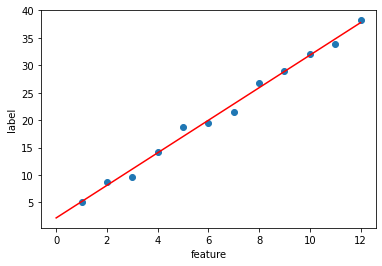

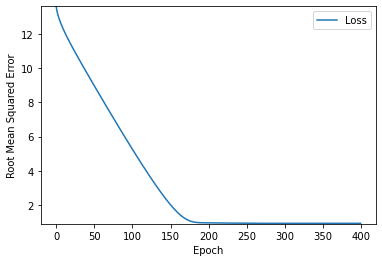

In [13]:
learning_rate=0.01
epochs= 400   # Replace ? with an integer.
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/450
1/1 [==============================] - 0s 871us/step - loss: 1328.2345 - root_mean_squared_error: 36.4450
Epoch 2/450
1/1 [==============================] - 0s 779us/step - loss: 1309.2863 - root_mean_squared_error: 36.1841
Epoch 3/450
1/1 [==============================] - 0s 808us/step - loss: 1295.6715 - root_mean_squared_error: 35.9954
Epoch 4/450
1/1 [==============================] - 0s 890us/step - loss: 1284.3497 - root_mean_squared_error: 35.8378
Epoch 5/450
1/1 [==============================] - 0s 1ms/step - loss: 1274.3564 - root_mean_squared_error: 35.6981
Epoch 6/450
1/1 [==============================] - 0s 1ms/step - loss: 1265.2445 - root_mean_squared_error: 35.5703
Epoch 7/450
1/1 [==============================] - 0s 755us/step - loss: 1256.7648 - root_mean_squared_error: 35.4509
Epoch 8/450
1/1 [==============================] - 0s 718us/step - loss: 1248.7623 - root_mean_squared_error: 35.3378
Epoch 9/450
1/1 [==============================] - 0s 1ms/st

1/1 [==============================] - 0s 1ms/step - loss: 906.6779 - root_mean_squared_error: 30.1111
Epoch 71/450
1/1 [==============================] - 0s 1ms/step - loss: 901.8343 - root_mean_squared_error: 30.0306
Epoch 72/450
1/1 [==============================] - 0s 940us/step - loss: 897.0042 - root_mean_squared_error: 29.9500
Epoch 73/450
1/1 [==============================] - 0s 1ms/step - loss: 892.1878 - root_mean_squared_error: 29.8695
Epoch 74/450
1/1 [==============================] - 0s 945us/step - loss: 887.3846 - root_mean_squared_error: 29.7890
Epoch 75/450
1/1 [==============================] - 0s 1ms/step - loss: 882.5949 - root_mean_squared_error: 29.7085
Epoch 76/450
1/1 [==============================] - 0s 977us/step - loss: 877.8186 - root_mean_squared_error: 29.6280
Epoch 77/450
1/1 [==============================] - 0s 1ms/step - loss: 873.0557 - root_mean_squared_error: 29.5475
Epoch 78/450
1/1 [==============================] - 0s 956us/step - loss: 868.3

1/1 [==============================] - 0s 729us/step - loss: 603.7266 - root_mean_squared_error: 24.5708
Epoch 140/450
1/1 [==============================] - 0s 673us/step - loss: 599.8000 - root_mean_squared_error: 24.4908
Epoch 141/450
1/1 [==============================] - 0s 947us/step - loss: 595.8866 - root_mean_squared_error: 24.4108
Epoch 142/450
1/1 [==============================] - 0s 923us/step - loss: 591.9864 - root_mean_squared_error: 24.3308
Epoch 143/450
1/1 [==============================] - 0s 1ms/step - loss: 588.0994 - root_mean_squared_error: 24.2508
Epoch 144/450
1/1 [==============================] - 0s 2ms/step - loss: 584.2258 - root_mean_squared_error: 24.1708
Epoch 145/450
1/1 [==============================] - 0s 960us/step - loss: 580.3652 - root_mean_squared_error: 24.0908
Epoch 146/450
1/1 [==============================] - 0s 1ms/step - loss: 576.5179 - root_mean_squared_error: 24.0108
Epoch 147/450
1/1 [==============================] - 0s 875us/step -

1/1 [==============================] - 0s 863us/step - loss: 363.7265 - root_mean_squared_error: 19.0716
Epoch 209/450
1/1 [==============================] - 0s 1ms/step - loss: 360.7084 - root_mean_squared_error: 18.9923
Epoch 210/450
1/1 [==============================] - 0s 1ms/step - loss: 357.7034 - root_mean_squared_error: 18.9130
Epoch 211/450
1/1 [==============================] - 0s 958us/step - loss: 354.7115 - root_mean_squared_error: 18.8338
Epoch 212/450
1/1 [==============================] - 0s 945us/step - loss: 351.7327 - root_mean_squared_error: 18.7545
Epoch 213/450
1/1 [==============================] - 0s 972us/step - loss: 348.7670 - root_mean_squared_error: 18.6753
Epoch 214/450
1/1 [==============================] - 0s 1ms/step - loss: 345.8144 - root_mean_squared_error: 18.5961
Epoch 215/450
1/1 [==============================] - 0s 1ms/step - loss: 342.8748 - root_mean_squared_error: 18.5169
Epoch 216/450
1/1 [==============================] - 0s 868us/step - l

1/1 [==============================] - 0s 1ms/step - loss: 186.0785 - root_mean_squared_error: 13.6411
Epoch 278/450
1/1 [==============================] - 0s 873us/step - loss: 183.9580 - root_mean_squared_error: 13.5631
Epoch 279/450
1/1 [==============================] - 0s 818us/step - loss: 181.8504 - root_mean_squared_error: 13.4852
Epoch 280/450
1/1 [==============================] - 0s 2ms/step - loss: 179.7557 - root_mean_squared_error: 13.4073
Epoch 281/450
1/1 [==============================] - 0s 1ms/step - loss: 177.6738 - root_mean_squared_error: 13.3294
Epoch 282/450
1/1 [==============================] - 0s 1ms/step - loss: 175.6049 - root_mean_squared_error: 13.2516
Epoch 283/450
1/1 [==============================] - 0s 1ms/step - loss: 173.5488 - root_mean_squared_error: 13.1738
Epoch 284/450
1/1 [==============================] - 0s 1ms/step - loss: 171.5056 - root_mean_squared_error: 13.0960
Epoch 285/450
1/1 [==============================] - 0s 922us/step - loss:

1/1 [==============================] - 0s 786us/step - loss: 69.7285 - root_mean_squared_error: 8.3504
Epoch 347/450
1/1 [==============================] - 0s 879us/step - loss: 68.4840 - root_mean_squared_error: 8.2755
Epoch 348/450
1/1 [==============================] - 0s 1ms/step - loss: 67.2519 - root_mean_squared_error: 8.2007
Epoch 349/450
1/1 [==============================] - 0s 1ms/step - loss: 66.0322 - root_mean_squared_error: 8.1260
Epoch 350/450
1/1 [==============================] - 0s 909us/step - loss: 64.8249 - root_mean_squared_error: 8.0514
Epoch 351/450
1/1 [==============================] - 0s 1ms/step - loss: 63.6300 - root_mean_squared_error: 7.9768
Epoch 352/450
1/1 [==============================] - 0s 987us/step - loss: 62.4475 - root_mean_squared_error: 7.9024
Epoch 353/450
1/1 [==============================] - 0s 2ms/step - loss: 61.2774 - root_mean_squared_error: 7.8280
Epoch 354/450
1/1 [==============================] - 0s 985us/step - loss: 60.1196 - r

1/1 [==============================] - 0s 1ms/step - loss: 11.7525 - root_mean_squared_error: 3.4282
Epoch 417/450
1/1 [==============================] - 0s 1ms/step - loss: 11.3334 - root_mean_squared_error: 3.3665
Epoch 418/450
1/1 [==============================] - 0s 2ms/step - loss: 10.9249 - root_mean_squared_error: 3.3053
Epoch 419/450
1/1 [==============================] - 0s 1ms/step - loss: 10.5270 - root_mean_squared_error: 3.2445
Epoch 420/450
1/1 [==============================] - 0s 2ms/step - loss: 10.1397 - root_mean_squared_error: 3.1843
Epoch 421/450
1/1 [==============================] - 0s 1ms/step - loss: 9.7628 - root_mean_squared_error: 3.1246
Epoch 422/450
1/1 [==============================] - 0s 1ms/step - loss: 9.3964 - root_mean_squared_error: 3.0654
Epoch 423/450
1/1 [==============================] - 0s 1ms/step - loss: 9.0404 - root_mean_squared_error: 3.0067
Epoch 424/450
1/1 [==============================] - 0s 936us/step - loss: 8.6946 - root_mean_squ

/Users/eric/.conda/envs/mlbase/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


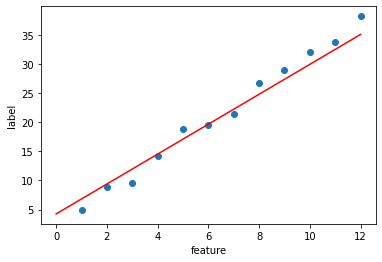

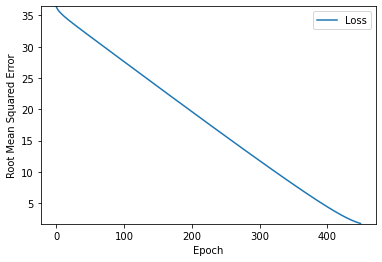

In [14]:
#@title Double-click to view a possible s 
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# The loss curve suggests that the model does converge.

## Task 3: Increase the learning rate

In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500
1/1 [==============================] - 0s 854us/step - loss: 1142.0425 - root_mean_squared_error: 33.7941
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 6641472.0000 - root_mean_squared_error: 2577.1055
Epoch 3/500
1/1 [==============================] - 0s 938us/step - loss: 1128.4662 - root_mean_squared_error: 33.5927
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 6.8025 - root_mean_squared_error: 2.6082
Epoch 5/500
1/1 [==============================] - 0s 743us/step - loss: 1.6720 - root_mean_squared_error: 1.2931
Epoch 6/500
1/1 [==============================] - 0s 724us/step - loss: 1.5497 - root_mean_squared_error: 1.2449
Epoch 7/500
1/1 [==============================] - 0s 810us/step - loss: 1.5038 - root_mean_squared_error: 1.2263
Epoch 8/500
1/1 [==============================] - 0s 810us/step - loss: 1.4610 - root_mean_squared_error: 1.2087
Epoch 9/500
1/1 [==============================] - 0s 909us/step - loss: 1.

1/1 [==============================] - 0s 661us/step - loss: 173701.7031 - root_mean_squared_error: 416.7754
Epoch 71/500
1/1 [==============================] - 0s 810us/step - loss: 131563.6719 - root_mean_squared_error: 362.7171
Epoch 72/500
1/1 [==============================] - 0s 868us/step - loss: 106906.8516 - root_mean_squared_error: 326.9661
Epoch 73/500
1/1 [==============================] - 0s 1ms/step - loss: 95266.0000 - root_mean_squared_error: 308.6519
Epoch 74/500
1/1 [==============================] - 0s 763us/step - loss: 93661.1953 - root_mean_squared_error: 306.0412
Epoch 75/500
1/1 [==============================] - 0s 867us/step - loss: 101004.1641 - root_mean_squared_error: 317.8115
Epoch 76/500
1/1 [==============================] - 0s 1ms/step - loss: 117548.6016 - root_mean_squared_error: 342.8536
Epoch 77/500
1/1 [==============================] - 0s 942us/step - loss: 143737.0781 - root_mean_squared_error: 379.1267
Epoch 78/500
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - loss: 173085.2500 - root_mean_squared_error: 416.0352
Epoch 138/500
1/1 [==============================] - 0s 1ms/step - loss: 171795.5000 - root_mean_squared_error: 414.4822
Epoch 139/500
1/1 [==============================] - 0s 1ms/step - loss: 170367.6562 - root_mean_squared_error: 412.7562
Epoch 140/500
1/1 [==============================] - 0s 1ms/step - loss: 169102.5000 - root_mean_squared_error: 411.2207
Epoch 141/500
1/1 [==============================] - 0s 896us/step - loss: 168230.8281 - root_mean_squared_error: 410.1595
Epoch 142/500
1/1 [==============================] - 0s 1ms/step - loss: 167880.0781 - root_mean_squared_error: 409.7317
Epoch 143/500
1/1 [==============================] - 0s 1ms/step - loss: 168064.7656 - root_mean_squared_error: 409.9570
Epoch 144/500
1/1 [==============================] - 0s 651us/step - loss: 168696.4844 - root_mean_squared_error: 410.7268
Epoch 145/500
1/1 [=======================

1/1 [==============================] - 0s 728us/step - loss: 170516.0156 - root_mean_squared_error: 412.9359
Epoch 205/500
1/1 [==============================] - 0s 739us/step - loss: 170498.0781 - root_mean_squared_error: 412.9141
Epoch 206/500
1/1 [==============================] - 0s 753us/step - loss: 170465.7656 - root_mean_squared_error: 412.8750
Epoch 207/500
1/1 [==============================] - 0s 733us/step - loss: 170427.1094 - root_mean_squared_error: 412.8282
Epoch 208/500
1/1 [==============================] - 0s 768us/step - loss: 170390.4531 - root_mean_squared_error: 412.7838
Epoch 209/500
1/1 [==============================] - 0s 689us/step - loss: 170362.8594 - root_mean_squared_error: 412.7504
Epoch 210/500
1/1 [==============================] - 0s 1ms/step - loss: 170348.8906 - root_mean_squared_error: 412.7334
Epoch 211/500
1/1 [==============================] - 0s 1ms/step - loss: 170350.1094 - root_mean_squared_error: 412.7349
Epoch 212/500
1/1 [===============

1/1 [==============================] - 0s 2ms/step - loss: 170419.9375 - root_mean_squared_error: 412.8195
Epoch 272/500
1/1 [==============================] - 0s 1ms/step - loss: 170420.2344 - root_mean_squared_error: 412.8199
Epoch 273/500
1/1 [==============================] - 0s 656us/step - loss: 170420.0625 - root_mean_squared_error: 412.8196
Epoch 274/500
1/1 [==============================] - 0s 672us/step - loss: 170419.3125 - root_mean_squared_error: 412.8187
Epoch 275/500
1/1 [==============================] - 0s 704us/step - loss: 170418.3281 - root_mean_squared_error: 412.8175
Epoch 276/500
1/1 [==============================] - 0s 700us/step - loss: 170417.2344 - root_mean_squared_error: 412.8162
Epoch 277/500
1/1 [==============================] - 0s 941us/step - loss: 170416.3438 - root_mean_squared_error: 412.8152
Epoch 278/500
1/1 [==============================] - 0s 861us/step - loss: 170415.7812 - root_mean_squared_error: 412.8145
Epoch 279/500
1/1 [===============

1/1 [==============================] - 0s 1ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 339/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.7031 - root_mean_squared_error: 412.8168
Epoch 340/500
1/1 [==============================] - 0s 683us/step - loss: 170417.7656 - root_mean_squared_error: 412.8169
Epoch 341/500
1/1 [==============================] - 0s 903us/step - loss: 170417.6719 - root_mean_squared_error: 412.8167
Epoch 342/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.5625 - root_mean_squared_error: 412.8166
Epoch 343/500
1/1 [==============================] - 0s 748us/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 344/500
1/1 [==============================] - 0s 710us/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 345/500
1/1 [==============================] - 0s 733us/step - loss: 170417.4062 - root_mean_squared_error: 412.8164
Epoch 346/500
1/1 [=================

1/1 [==============================] - 0s 702us/step - loss: 170417.6250 - root_mean_squared_error: 412.8167
Epoch 405/500
1/1 [==============================] - 0s 693us/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 406/500
1/1 [==============================] - 0s 681us/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 407/500
1/1 [==============================] - 0s 715us/step - loss: 170417.5781 - root_mean_squared_error: 412.8167
Epoch 408/500
1/1 [==============================] - 0s 669us/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 409/500
1/1 [==============================] - 0s 796us/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 410/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.4219 - root_mean_squared_error: 412.8164
Epoch 411/500
1/1 [==============================] - 0s 788us/step - loss: 170417.3906 - root_mean_squared_error: 412.8164
Epoch 412/500
1/1 [=============

1/1 [==============================] - 0s 798us/step - loss: 170417.5781 - root_mean_squared_error: 412.8167
Epoch 472/500
1/1 [==============================] - 0s 890us/step - loss: 170417.5938 - root_mean_squared_error: 412.8167
Epoch 473/500
1/1 [==============================] - 0s 732us/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 474/500
1/1 [==============================] - 0s 672us/step - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 475/500
1/1 [==============================] - 0s 859us/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 476/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 477/500
1/1 [==============================] - 0s 688us/step - loss: 170417.5781 - root_mean_squared_error: 412.8167
Epoch 478/500
1/1 [==============================] - 0s 1ms/step - loss: 170417.6875 - root_mean_squared_error: 412.8168
Epoch 479/500
1/1 [===============

/Users/eric/.conda/envs/mlbase/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


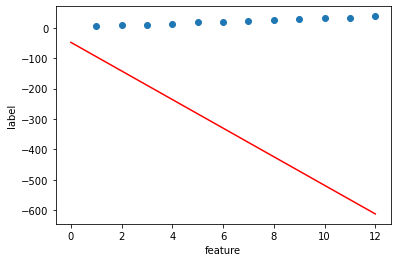

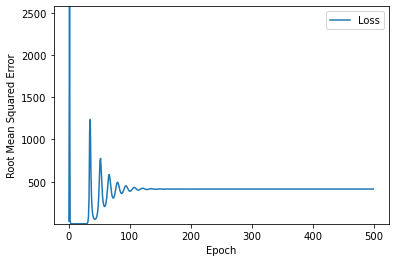

In [15]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a [roller coaster](https://www.wikipedia.org/wiki/Roller_coaster).  An oscillating loss curve strongly suggests that the learning rate is too high. 

## Task 4: Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible: 

*  learning_rate
*  epochs

Epoch 1/65
1/1 [==============================] - 0s 908us/step - loss: 367.3199 - root_mean_squared_error: 19.1656
Epoch 2/65
1/1 [==============================] - 0s 1ms/step - loss: 248.8947 - root_mean_squared_error: 15.7764
Epoch 3/65
1/1 [==============================] - 0s 1ms/step - loss: 183.7997 - root_mean_squared_error: 13.5573
Epoch 4/65
1/1 [==============================] - 0s 1ms/step - loss: 139.9637 - root_mean_squared_error: 11.8306
Epoch 5/65
1/1 [==============================] - 0s 824us/step - loss: 108.0538 - root_mean_squared_error: 10.3949
Epoch 6/65
1/1 [==============================] - 0s 680us/step - loss: 83.8996 - root_mean_squared_error: 9.1597
Epoch 7/65
1/1 [==============================] - 0s 703us/step - loss: 65.2202 - root_mean_squared_error: 8.0759
Epoch 8/65
1/1 [==============================] - 0s 1ms/step - loss: 50.6058 - root_mean_squared_error: 7.1138
Epoch 9/65
1/1 [==============================] - 0s 866us/step - loss: 39.1105 - root

/Users/eric/.conda/envs/mlbase/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


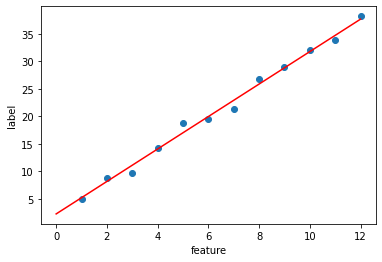

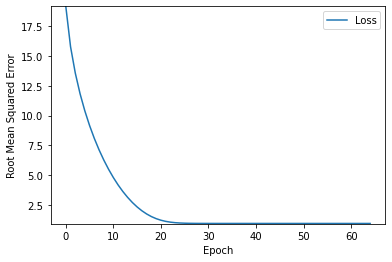

In [18]:
# Set the learning rate and number of epochs
learning_rate= 0.13  # Replace ? with a floating-point number
epochs= 65   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 990us/step - loss: 1034.5702 - root_mean_squared_error: 32.1647
Epoch 2/70
1/1 [==============================] - 0s 1ms/step - loss: 812.9653 - root_mean_squared_error: 28.5125
Epoch 3/70
1/1 [==============================] - 0s 1ms/step - loss: 677.0311 - root_mean_squared_error: 26.0198
Epoch 4/70
1/1 [==============================] - 0s 1ms/step - loss: 576.7755 - root_mean_squared_error: 24.0161
Epoch 5/70
1/1 [==============================] - 0s 729us/step - loss: 497.1628 - root_mean_squared_error: 22.2971
Epoch 6/70
1/1 [==============================] - 0s 743us/step - loss: 431.3899 - root_mean_squared_error: 20.7699
Epoch 7/70
1/1 [==============================] - 0s 691us/step - loss: 375.7209 - root_mean_squared_error: 19.3835
Epoch 8/70
1/1 [==============================] - 0s 810us/step - loss: 327.8513 - root_mean_squared_error: 18.1067
Epoch 9/70
1/1 [==============================] - 0s 1ms/step - loss: 286.243

/Users/eric/.conda/envs/mlbase/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


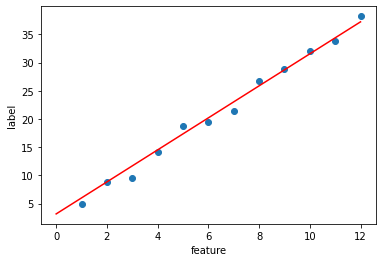

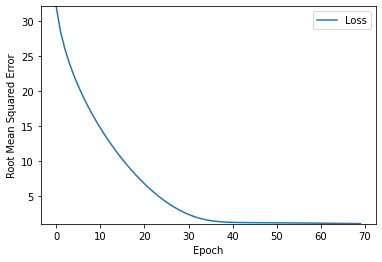

In [19]:
#@title Double-click to view a possible solution

learning_rate=0.14
epochs=70
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Task 5: Adjust the batch size

The system recalculates the model's loss value and adjusts the model's weights and bias after each **iteration**.  Each iteration is the span in which the system processes one batch. For example, if the **batch size** is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.  

One **epoch** spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.  

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge. 

Experiment with `batch_size` in the following code cell. What's the smallest integer you can set for `batch_size` and still have the model converge in a hundred epochs?

Epoch 1/100
1/1 [==============================] - 0s 881us/step - loss: 186.5416 - root_mean_squared_error: 13.6580
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 152.6761 - root_mean_squared_error: 12.3562
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 131.2984 - root_mean_squared_error: 11.4586
Epoch 4/100
1/1 [==============================] - 0s 709us/step - loss: 115.1687 - root_mean_squared_error: 10.7317
Epoch 5/100
1/1 [==============================] - 0s 872us/step - loss: 102.0897 - root_mean_squared_error: 10.1039
Epoch 6/100
1/1 [==============================] - 0s 880us/step - loss: 91.0633 - root_mean_squared_error: 9.5427
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 81.5406 - root_mean_squared_error: 9.0300
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 73.1828 - root_mean_squared_error: 8.5547
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 65.7644

1/1 [==============================] - 0s 736us/step - loss: 0.9062 - root_mean_squared_error: 0.9520
Epoch 73/100
1/1 [==============================] - 0s 883us/step - loss: 0.9050 - root_mean_squared_error: 0.9513
Epoch 74/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9037 - root_mean_squared_error: 0.9506
Epoch 75/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9024 - root_mean_squared_error: 0.9500
Epoch 76/100
1/1 [==============================] - 0s 1ms/step - loss: 0.9012 - root_mean_squared_error: 0.9493
Epoch 77/100
1/1 [==============================] - 0s 1ms/step - loss: 0.8999 - root_mean_squared_error: 0.9486
Epoch 78/100
1/1 [==============================] - 0s 679us/step - loss: 0.8986 - root_mean_squared_error: 0.9479
Epoch 79/100
1/1 [==============================] - 0s 941us/step - loss: 0.8973 - root_mean_squared_error: 0.9473
Epoch 80/100
1/1 [==============================] - 0s 913us/step - loss: 0.8960 - root_mean_squared_

/Users/eric/.conda/envs/mlbase/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


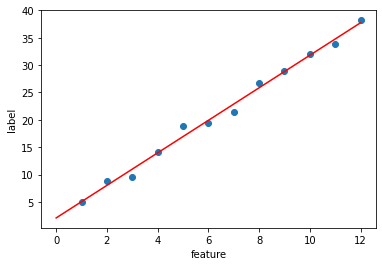

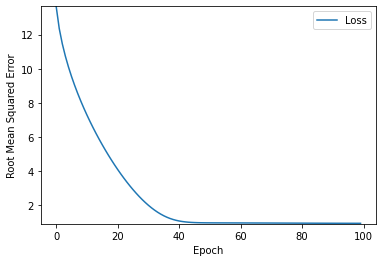

In [21]:
learning_rate=0.05
epochs=100
my_batch_size=6  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/125
1/1 [==============================] - 0s 1ms/step - loss: 768.2532 - root_mean_squared_error: 27.7174
Epoch 2/125
1/1 [==============================] - 0s 1ms/step - loss: 697.6463 - root_mean_squared_error: 26.4130
Epoch 3/125
1/1 [==============================] - 0s 1ms/step - loss: 649.6736 - root_mean_squared_error: 25.4887
Epoch 4/125
1/1 [==============================] - 0s 847us/step - loss: 611.3787 - root_mean_squared_error: 24.7261
Epoch 5/125
1/1 [==============================] - 0s 971us/step - loss: 578.7313 - root_mean_squared_error: 24.0568
Epoch 6/125
1/1 [==============================] - 0s 765us/step - loss: 549.8802 - root_mean_squared_error: 23.4495
Epoch 7/125
1/1 [==============================] - 0s 2ms/step - loss: 523.8010 - root_mean_squared_error: 22.8867
Epoch 8/125
1/1 [==============================] - 0s 1ms/step - loss: 499.8600 - root_mean_squared_error: 22.3575
Epoch 9/125
1/1 [==============================] - 0s 1ms/step - loss: 477

1/1 [==============================] - 0s 651us/step - loss: 5.7106 - root_mean_squared_error: 2.3897
Epoch 72/125
1/1 [==============================] - 0s 1ms/step - loss: 4.9808 - root_mean_squared_error: 2.2318
Epoch 73/125
1/1 [==============================] - 0s 689us/step - loss: 4.3416 - root_mean_squared_error: 2.0836
Epoch 74/125
1/1 [==============================] - 0s 737us/step - loss: 3.7860 - root_mean_squared_error: 1.9458
Epoch 75/125
1/1 [==============================] - 0s 1ms/step - loss: 3.3069 - root_mean_squared_error: 1.8185
Epoch 76/125
1/1 [==============================] - 0s 676us/step - loss: 2.8974 - root_mean_squared_error: 1.7022
Epoch 77/125
1/1 [==============================] - 0s 886us/step - loss: 2.5506 - root_mean_squared_error: 1.5971
Epoch 78/125
1/1 [==============================] - 0s 1ms/step - loss: 2.2598 - root_mean_squared_error: 1.5033
Epoch 79/125
1/1 [==============================] - 0s 1ms/step - loss: 2.0186 - root_mean_squared_

/Users/eric/.conda/envs/mlbase/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


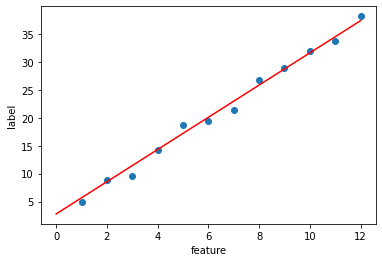

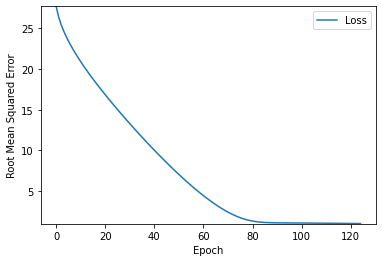

In [22]:
#@title Double-click to view a possible solution

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the training loss too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.